# Лабораторная работа 2

Импорт необходимых библиотек:

In [134]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pathlib
import pandas as pd
import warnings
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error


warnings.filterwarnings('ignore')

Получение данных:

In [135]:
data = pd.read_csv(
    str(pathlib.Path.cwd() / 'data' / 'raw' / 'CompleteDataset.csv'), 
    usecols=[
        'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression',
        'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
        'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
        'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 
        'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 
        'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM',
        'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
        'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'
    ]
)

In [136]:
def euro_str_to_float(row):
    try:
        return np.float64(row[1:-1])
    except:
        return np.nan

data['Value'] = data['Value'].apply(euro_str_to_float)
data['Wage'] = data['Wage'].apply(euro_str_to_float)

data = data.dropna(how='any')

le = LabelEncoder()
for col in ('Nationality', 'Club', 'Preferred Positions'):
    data[col] = le.fit_transform(data[col])

data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(how='any')

In [137]:
Y = data['Overall']
X = data.drop(['Overall'], axis = 1)
feature_list = list(data.columns.values)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Columns values:
1) Age (0.824776)
2) Nationality (0.069862)
3) Overall (0.027430)
4) Club (0.013141)
5) Value (0.011326)
6) Wage (0.005029)
7) Special (0.003766)
8) Acceleration (0.003042)
9) Aggression (0.002847)
10) Agility (0.002750)
11) Balance (0.002491)
12) Ball control (0.002246)
13) Composure (0.002129)
14) Crossing (0.001917)
15) Curve (0.001758)
16) Dribbling (0.001754)
17) Finishing (0.001547)
18) Free kick accuracy (0.001429)
19) GK diving (0.001347)
20) GK handling (0.001294)
21) GK kicking (0.001195)
22) GK positioning (0.001114)
23) GK reflexes (0.000925)
24) Heading accuracy (0.000910)
25) Interceptions (0.000861)
26) Jumping (0.000855)
27) Long passing (0.000737)
28) Long shots (0.000719)
29) Marking (0.000706)
30) Penalties (0.000696)
31) Positioning (0.000690)
32) Reactions (0.000684)
33) Short passing (0.000610)
34) Shot power (0.000574)
35) Sliding tackle (0.000573)
36) Sprint speed (0.000521)
37) Stamina (0.000477)
38) Standing tackle (0.000464)
39) Strength (0.00

(-1, 68)

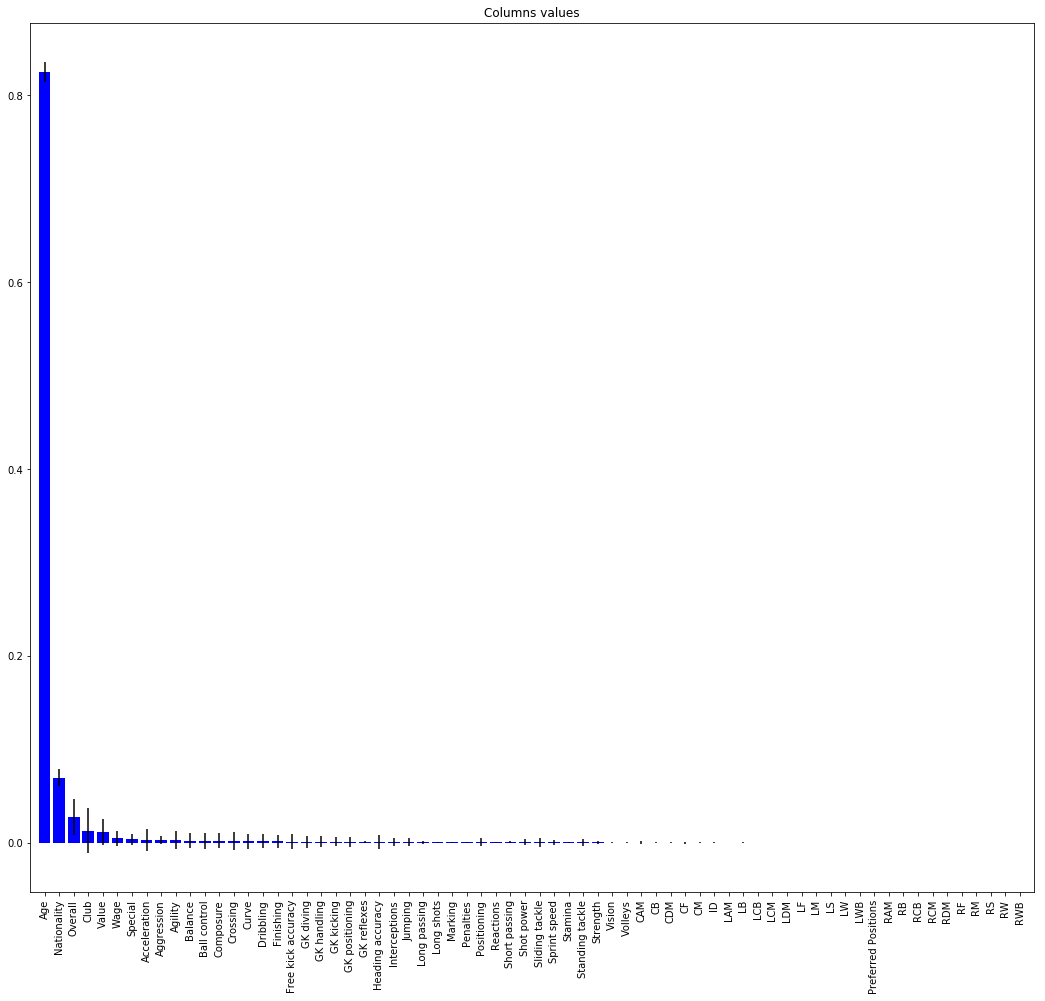

In [139]:
est = RandomForestRegressor(n_estimators=100, n_jobs=-1)  # Use all cores
est.fit(X_train, Y_train)
Y_pred = est.predict(X_test)

importances = est.feature_importances_
std = np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Columns values:")
for f in range(X.shape[1]):
    print("%d) %s (%f)" % (f + 1, feature_list[f], importances[indices[f]]))

plt.figure(figsize=(18, 16))
plt.title("Columns values")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_list, rotation='vertical')
plt.xlim([-1, X.shape[1]])

In [132]:
# rank correlation
print(kendalltau(Y_pred, Y_test))
print(spearmanr(Y_pred, Y_test))

# R^2, dispersion part
print('R^2 =', est.score(X_test, Y_test))

# measures the proportion to which a mathematical model accounts for the variation (dispersion)
print('EVS =', explained_variance_score(Y_test, Y_pred))

# avarage absolute error
print('MAE =', mean_absolute_error(Y_test, Y_pred))

# median absolute error
print('MedAE =', median_absolute_error(Y_test, Y_pred))

KendalltauResult(correlation=0.064382185799385191, pvalue=2.1431120744255479e-07)
SpearmanrResult(correlation=0.098358177294926519, pvalue=5.8215547859298263e-08)
R^2 = -79.1894893439
EVS = -79.159141759
MAE = 21.2550676791
MedAE = 10.2
